In [19]:
library(dplyr)
library(broom)
library(tibble)
library(tidyr)
library(purrr)
library(ggplot2)
library(gridExtra)

In [7]:
iris %>% 
group_by(Species) %>% 
nest %>%
mutate(mod = map(data, ~lm(Sepal.Length ~ Sepal.Width, .))) %>%
mutate(
    tidy = map(mod, broom::tidy),
    glance = map(mod, broom::glance),
    augment = map(mod, broom::augment)
) -> models

models %>% print

df <- models %>% select(Species, augment) %>% unnest

df %>% print

# A tibble: 3 x 6
     Species              data      mod                 tidy
      <fctr>            <list>   <list>               <list>
1     setosa <tibble [50 x 4]> <S3: lm> <data.frame [2 x 5]>
2 versicolor <tibble [50 x 4]> <S3: lm> <data.frame [2 x 5]>
3  virginica <tibble [50 x 4]> <S3: lm> <data.frame [2 x 5]>
# ... with 2 more variables: glance <list>, augment <list>
# A tibble: 150 x 10
   Species Sepal.Length Sepal.Width  .fitted    .se.fit      .resid       .hat
    <fctr>        <dbl>       <dbl>    <dbl>      <dbl>       <dbl>      <dbl>
 1  setosa          5.1         3.5 5.055715 0.03435031  0.04428474 0.02073628
 2  setosa          4.9         3.0 4.710470 0.05117134  0.18952960 0.04601750
 3  setosa          4.7         3.2 4.848568 0.03947370 -0.14856834 0.02738325
 4  setosa          4.6         3.1 4.779519 0.04480537 -0.17951937 0.03528008
 5  setosa          5.0         3.6 5.124764 0.03710984 -0.12476423 0.02420180
 6  setosa          5.4         3.9 5.331911

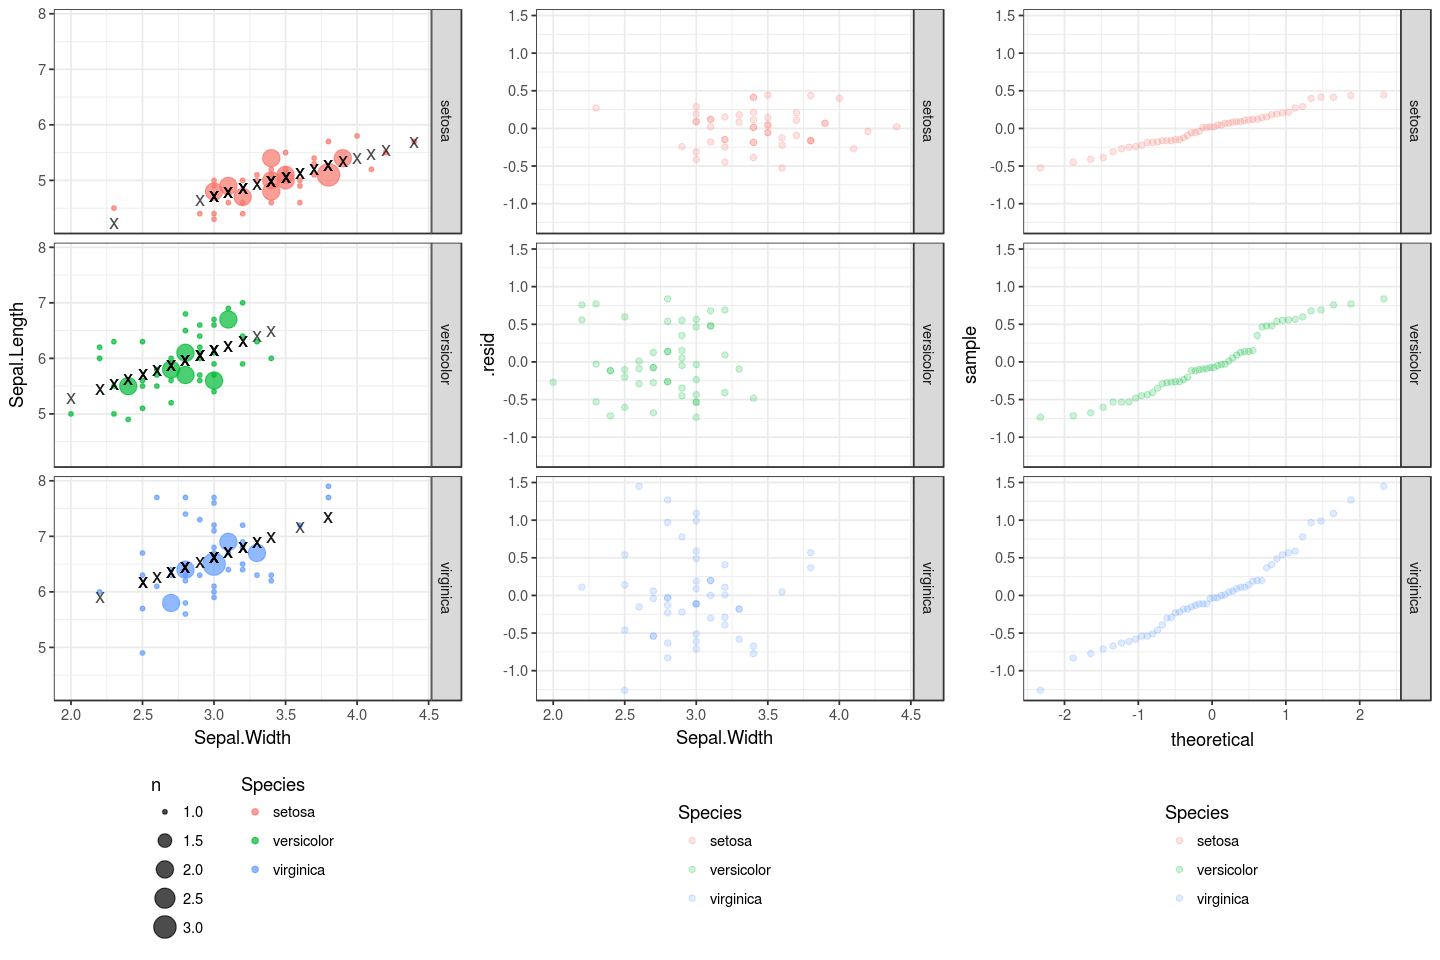

In [41]:
options(repr.plot.width = 12, repr.plot.height = 8)

p1 <- ggplot() +
geom_count(data=df, aes(x=Sepal.Width, y=Sepal.Length, colour = Species), alpha=0.7) +
geom_point(data=df, aes(x=Sepal.Width, y=.fitted), alpha=0.7, color="black", shape='x', size=4) +
facet_grid(Species~.) +
theme_bw() +
theme(legend.position = "bottom", legend.direction = "vertical")

p2 <- ggplot() +
geom_point(data=df, aes(x=Sepal.Width, y=.resid, colour=Species), alpha=0.2) +
facet_grid(Species~.) +
theme_bw()+
theme(legend.position = "bottom", legend.direction = "vertical")


p3 <- ggplot() +
stat_qq(data=df, aes(sample=.resid, colour=Species), distribution=qnorm, alpha=0.2) +
facet_grid(Species~.) +
theme_bw()+
theme(legend.position = "bottom", legend.direction = "vertical")


p <- list(p1, p2, p3) %>% purrr::map(~ggplot_gtable(ggplot_build(.)))

do.call(cbind.gtable, p) %>% grid.arrange()